In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

def interpret_output(A2):
    return np.argmax(A2, axis=0)[0]

def encode(y):
    encoded = np.zeros((1, 10))
    encoded[0, y] = 1
    return np.transpose(encoded)

def sigmoid(x, deriv=False):
    sig = 1/(1 + np.exp(-x))
    if(deriv):
        return sig*(1-sig)
    return sig


def init_params():
    W1 = np.random.uniform(-0.5, 0.5, (128, 784)).astype('float128')
    b1 = np.zeros((128,1)).astype('float128')
    W2 = np.random.uniform(-0.5, 0.5, (64, 128)).astype('float128')
    b2 = np.zeros((64,1)).astype('float128')
    W3 = np.random.uniform(-0.5, 0.5, (10, 64)).astype('float128')
    b3 = np.zeros((10,1)).astype('float128')
    return W1, b1, W2, b2, W3, b3

def forward_prop(W1, b1, W2, b2, W3, b3, A0):
    Z1=W1.dot(A0) + b1
    A1=sigmoid(Z1)
    Z2=W2.dot(A1) + b2
    A2=sigmoid(Z2)
    Z3=W3.dot(A2) + b3
    A3=sigmoid(Z3)
    return A1, Z1, A2, Z2, A3, Z3

def back_prop(A1, Z1, A2, Z2, A3, Z3, A0, y):
    #cost function = 1/2 * sum((A2_i - Y_i)^2)
    dZ3 = (A3 - encode(y))*sigmoid(Z3, deriv=True)
    dW3 = dZ3.dot(np.transpose(A2))
    db3 = dZ3
    dZ2 = np.transpose(dW3).dot(dZ3) * sigmoid(Z2, deriv=True)
    dW2 = dZ2.dot(np.transpose(A1))
    db2 = dZ2
    dZ1 = np.transpose(dW2).dot(dZ2) * sigmoid(Z1, deriv=True)
    dW1 = dZ1.dot(np.transpose(A0))
    db1 = dZ1
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha*dW1
    W2 = W2 - alpha*dW2
    W3 = W3 - alpha*dW3
    b1 = b1 - alpha*db1
    b2 = b2 - alpha*db2
    b3 = b3 - alpha*db3 
    return W1, b1, W2, b2, W3, b3

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data = np.array(data)


In [3]:
def train(data, epochs, alpha):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(epochs):
        for j in range(len(data)-1):
            A0 = data[j][1:785]
            A0.shape += (1,)
            y = data[j][0]
            A1, Z1, A2, Z2, A3, Z3 = forward_prop(W1, b1, W2, b2, W3, b3, A0)
            dW1, db1, dW2, db2, dW3, db3 = back_prop(A1, Z1, A2, Z2, A3, Z3, A0, y)
            W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
    return W1, b1, W2, b2, W3, b3

a, b, c, d, e, f = train(data[0:1000], 100, 0.05)

In [4]:
def test(data, W1, b1, W2, b2, W3, b3):
    results = 0
    for i in range(len(data)-1):
        A0 = data[i][1:785]
        A0.shape += (1,)
        y = data[i][0]
        A1, Z1, A2, Z2, A3, Z3 = forward_prop(W1, b1, W2, b2, W3, b3, A0)
        res = interpret_output(A3) == y
        if(res):
            results = results + 1
    print('accuracy:', results/len(data) * 100 , "%")
test(data[1000:2000], a, b, c, d, e, f)

accuracy: 24.7 %


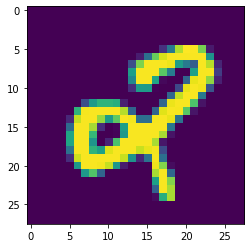

2


In [5]:
def test_prediction(W1, b1, W2, b2, W3, b3, A0, y):
    A1, Z1, A2, Z2, A3, Z3 = forward_prop(W1, b1, W2, b2, W3, b3, A0)
    img = A0.reshape((28,28)) * 255
    plt.imshow(img, interpolation = "nearest")
    plt.show()
    res = interpret_output(A3)
    print(res)
    
i=104
test_prediction(a, b, c, d, e, f, data[i][1:785], data[i][0])
